In [20]:
!pip install xlrd

In [21]:
!pip install folium
!pip install tslearn

In [8]:
import numpy as np
import pandas as pd 
from pandas import DataFrame
import os      
import seaborn as sns
import matplotlib.pyplot as plt

In [182]:
df_jan=pd.read_excel('철도통계_Jan.xls',sheet_name='노선별 여객수송(월)')
df_feb=pd.read_excel('철도통계_Feb.xls',sheet_name='노선별 여객수송(월)')
df_mar=pd.read_excel('철도통계_Mar.xls',sheet_name='노선별 여객수송(월)')
df_apr=pd.read_excel('철도통계_Apr.xls',sheet_name='노선별 여객수송(월)')
df_may=pd.read_excel('철도통계_May.xls',sheet_name='노선별 여객수송(월)')
df_june=pd.read_excel('철도통계_June.xls',sheet_name='노선별 여객수송(월)')

In [183]:
df_jan.head()

,노선/열차종별,합계_수송인원(명),합계_수입금액(원),KTX_수송인원(명),KTX_수입금액(원),새마을_수송인원(명),새마을_수입금액(원),무궁화_수송인원(명),무궁화_수입금액(원),통근열차_수송인원(명),...,누리로_수송인원(명),누리로_수입금액(원),KTX산천_수송인원(명),KTX산천_수입금액(원),ITX청춘열차_수송인원(명),ITX청춘열차_수입금액(원),ITX새마을_수송인원(명),ITX새마을_수입금액(원),KTX-호남_수송인원(명),KTX-호남_수입금액(원)
0,합 계,12029401,236015661082,4329343,146755029061,209757,2280174037,4322453,24773191714,11155,...,145879,783026984,1269082,38040843294,452188,2613416286,736970,9122784143,515860,11190770463
1,경부선,5492739,123012821104,2878302,99814291545,19179,304606200,1871624,10812275827,0,...,59842,258327085,127391,4187590440,0,0,486844,5974229527,49557,1661500480
2,호남선,1526226,35144670011,566752,19483177250,4153,77935900,323015,2222825542,11155,...,75969,479659899,358726,10606507659,0,0,174440,2125424227,12016,139030134
3,전라선,1210594,22583514674,365909,10589580727,9907,168940200,531115,3817101853,0,...,0,0,245745,7179522105,0,0,57918,828369789,0,0
4,기타,770101,10861608153,0,0,12846,148779000,332817,2169345191,0,...,0,0,0,0,0,0,0,0,424438,8543483962


In [184]:
df_jan=df_jan.iloc[:,[0,1]]
df_jan

,노선/열차종별,합계_수송인원(명)
0,합 계,12029401
1,경부선,5492739
2,호남선,1526226
3,전라선,1210594
4,기타,770101
5,경전선,728479
6,장항선,564056
7,동해선,508853
8,경춘선,452188
9,동해남부선,322417


In [221]:
df_feb=df_feb.iloc[:,[0,1]]
df_mar=df_mar.iloc[:,[0,1]]
df_apr=df_apr.iloc[:,[0,1]]
df_may=df_may.iloc[:,[0,1]]
df_june=df_june.iloc[:,[0,1]]

In [222]:
result=pd.concat([df_jan,df_feb,df_mar,df_apr,df_may,df_june],axis=1)
result.dropna(inplace=True)
result

,노선/열차종별,합계_수송인원(명),노선/열차종별,합계_수송인원(명),노선/열차종별,합계_수송인원(명),노선/열차종별,합계_수송인원(명),노선/열차종별,합계_수송인원(명),노선/열차종별,합계_수송인원(명)
0,합 계,12029401,합 계,7039739.0,합 계,4085433.0,합 계,5577505.0,합 계,7875367.0,합 계,7812478.0
1,경부선,5492739,경부선,3161492.0,경부선,1657181.0,경부선,2351013.0,경부선,3373269.0,경부선,3422481.0
2,호남선,1526226,호남선,898292.0,호남선,619220.0,호남선,779463.0,호남선,1068979.0,호남선,1020528.0
3,전라선,1210594,전라선,753404.0,전라선,485914.0,전라선,621373.0,전라선,858165.0,전라선,806966.0
4,기타,770101,기타,432207.0,기타,258121.0,기타,351303.0,기타,501133.0,기타,498253.0
5,경전선,728479,경전선,411876.0,장항선,230833.0,경전선,313221.0,경전선,468772.0,경전선,467795.0
6,장항선,564056,장항선,339725.0,경춘선,222315.0,장항선,301647.0,장항선,412301.0,장항선,401289.0
7,동해선,508853,경춘선,306938.0,경전선,219737.0,경춘선,260716.0,경춘선,340474.0,경춘선,330647.0
8,경춘선,452188,동해선,270503.0,동해선,128483.0,동해선,202793.0,동해선,307584.0,동해선,319614.0
9,동해남부선,322417,동해남부선,200629.0,동해남부선,100173.0,동해남부선,155702.0,동해남부선,227211.0,동해남부선,227198.0


In [223]:
result.drop(columns=['노선/열차종별'],inplace=True)
result

,합계_수송인원(명),합계_수송인원(명),합계_수송인원(명),합계_수송인원(명),합계_수송인원(명),합계_수송인원(명)
0,12029401,7039739.0,4085433.0,5577505.0,7875367.0,7812478.0
1,5492739,3161492.0,1657181.0,2351013.0,3373269.0,3422481.0
2,1526226,898292.0,619220.0,779463.0,1068979.0,1020528.0
3,1210594,753404.0,485914.0,621373.0,858165.0,806966.0
4,770101,432207.0,258121.0,351303.0,501133.0,498253.0
5,728479,411876.0,230833.0,313221.0,468772.0,467795.0
6,564056,339725.0,222315.0,301647.0,412301.0,401289.0
7,508853,306938.0,219737.0,260716.0,340474.0,330647.0
8,452188,270503.0,128483.0,202793.0,307584.0,319614.0
9,322417,200629.0,100173.0,155702.0,227211.0,227198.0


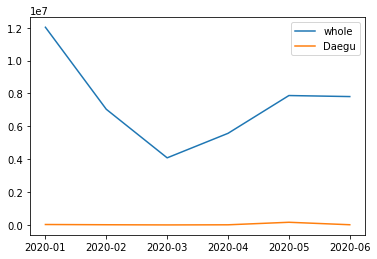

In [232]:
x_values=['2020-01',"2020-02",'2020-03','2020-04','2020-05','2020-06']
y_values_1=[12029401,7039739,4085433,5577505,7875367,7812478]
y_values_2=[30847,15963,5673,12711,166560,16360]

plt.plot(x_values,y_values_1)
plt.plot(x_values,y_values_2)
plt.legend(["whole",'Daegu'])
plt.show()

In [13]:
df=pd.read_csv(r"C:\Users\tndus\workspace\데이터과학\project\COVID_19/Time.csv")
df.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


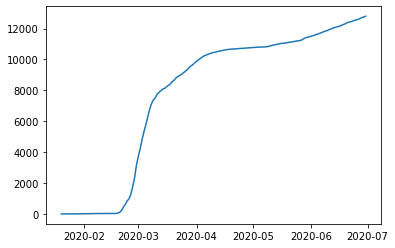

In [14]:
plt.plot(pd.to_datetime(df['date'],format='%Y-%m-%d'),df['confirmed'])
plt.show()